# Series
* 1차원 배열

In [1]:
import pandas as pd

In [2]:
list1 = ['monday', 'tuesday', 'wednesday', 'Thursday', 4, 5]
print(list1)
print(type(list1))

['monday', 'tuesday', 'wednesday', 'Thursday', 4, 5]
<class 'list'>


In [3]:
series1 = pd.Series(list1)
print(series1) # index: 0 ~ 
print(type(series1))

0       monday
1      tuesday
2    wednesday
3     Thursday
4            4
5            5
dtype: object
<class 'pandas.core.series.Series'>


In [4]:
series1.name = 'week' # 컬럼명
print(series1)

0       monday
1      tuesday
2    wednesday
3     Thursday
4            4
5            5
Name: week, dtype: object


In [5]:
dict1 = {'mon': 'monday', 'tue': 'tuesday', 'wed': 'wednesday'}
print(dict1)
print(type(dict1))

{'mon': 'monday', 'tue': 'tuesday', 'wed': 'wednesday'}
<class 'dict'>


In [6]:
series2 = pd.Series(dict1)
print(series2)

mon       monday
tue      tuesday
wed    wednesday
dtype: object


In [7]:
df = pd.read_csv('./data/samsung.csv', index_col=0, header=0)
df.head(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435


In [8]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [9]:
close = df['Close']
print(type(close))
print(close)

<class 'pandas.core.series.Series'>
Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2024-04-30    77500
2024-05-02    78000
2024-05-03    77600
2024-05-07    81300
2024-05-08    80900
Name: Close, Length: 1073, dtype: int64


In [10]:
close.index

Index(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
       ...
       '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-29',
       '2024-04-30', '2024-05-02', '2024-05-03', '2024-05-07', '2024-05-08'],
      dtype='object', name='Date', length=1073)

In [11]:
close.loc['2024-05-08'] # index 명으로 접근

80900

In [12]:
close.loc[['2024-05-07', '2024-05-08']] 

Date
2024-05-07    81300
2024-05-08    80900
Name: Close, dtype: int64

In [13]:
close.iloc[[0, -1]] # -1 : 마지막 값

Date
2020-01-02    55200
2024-05-08    80900
Name: Close, dtype: int64

In [14]:
close.shape

(1073,)

In [15]:
print(type(close.shape))
print(close.shape[0])

<class 'tuple'>
1073


## 2023년 주가만 추출하여 samsung_2023.xlsx 저장

In [16]:
print(type(close.index))
close.index.to_series().str.startswith('2023')

<class 'pandas.core.indexes.base.Index'>


Date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
              ...  
2024-04-30    False
2024-05-02    False
2024-05-03    False
2024-05-07    False
2024-05-08    False
Name: Date, Length: 1073, dtype: bool

In [17]:
# print(type(close.index.str.startswith('2023'))) # <class 'numpy.ndarray'>

In [18]:
samsung_2023 = close[close.index.to_series().str.startswith('2023')]
print(samsung_2023)

Date
2023-01-02    55500
2023-01-03    55400
2023-01-04    57800
2023-01-05    58200
2023-01-06    59000
              ...  
2023-12-21    75000
2023-12-22    75900
2023-12-26    76600
2023-12-27    78000
2023-12-28    78500
Name: Close, Length: 245, dtype: int64


In [19]:
samsung_2023.to_excel('./data/samsung_2023.xlsx', index=True, header=True)

In [20]:
samsung_2023 = pd.read_excel('./data/samsung_2023.xlsx', sheet_name='Sheet1', index_col='Date')['Close']
samsung_2023

Date
2023-01-02    55500
2023-01-03    55400
2023-01-04    57800
2023-01-05    58200
2023-01-06    59000
              ...  
2023-12-21    75000
2023-12-22    75900
2023-12-26    76600
2023-12-27    78000
2023-12-28    78500
Name: Close, Length: 245, dtype: int64

## 2024년 주가만 추출하여 samsung_2023.xlsx 저장

In [21]:
samsung_2024 = close[close.index.to_series().str.startswith('2024')]
samsung_2024.to_excel('./data/samsung_2024.xlsx', index=True, header=True)
samsung_2024 = pd.read_excel('./data/samsung_2024.xlsx', sheet_name='Sheet1', index_col='Date')['Close']
samsung_2024

Date
2024-01-02    79600
2024-01-03    77000
2024-01-04    76600
2024-01-05    76600
2024-01-08    76500
              ...  
2024-04-30    77500
2024-05-02    78000
2024-05-03    77600
2024-05-07    81300
2024-05-08    80900
Name: Close, Length: 86, dtype: int64

In [22]:
# 2023년 주가만 추출하여 samsung_2023.xlsx 저장 + 2024년 주가만 추출하여 samsung_2023.xlsx 저장
# samsung = samsung_2023.append(samsung_2024, ignore_index = False) # ignore_index = False : index 사용하지 말것

# samsung_2023, samsung_2024를 DataFrame으로 변환하여 데이터를 가져옴
samsung = pd.concat([samsung_2023, samsung_2024], ignore_index=False)
samsung

Date
2023-01-02    55500
2023-01-03    55400
2023-01-04    57800
2023-01-05    58200
2023-01-06    59000
              ...  
2024-04-30    77500
2024-05-02    78000
2024-05-03    77600
2024-05-07    81300
2024-05-08    80900
Name: Close, Length: 331, dtype: int64

In [23]:
df = pd.read_csv('./data/samsung.csv', index_col=0, header=0) # 2020 ~ 2024-05-08
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2024-04-30,77000,78500,76600,77500,19007007,0.010430
2024-05-02,77600,78600,77300,78000,18900640,0.006452
2024-05-03,79000,79000,77500,77600,13151889,-0.005128


In [24]:
samsung = df['Close'] # 종가 기준

In [25]:
print(type(samsung))
print(samsung.head())

<class 'pandas.core.series.Series'>
Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
Name: Close, dtype: int64


In [26]:
format(samsung.min(), ",")

'42,500'

In [27]:
format(samsung.max(), ",")

'91,000'

In [28]:
print(round((samsung.max() / samsung.min()) * 100, 2), "%")

214.12 %


In [29]:
print(round(((samsung.max() / samsung.min()) -1) * 100, 2), "%")

114.12 %


In [30]:
samsung.describe()
# 2023 ~ 2024
# count      331.000000
# mean     69759.818731 # 평균 주가
# std       5822.296639 # 주가 변동성, 일반적 상식: 크면 단타를 실행하면 높은 수익률이나 손해를 볼 수 있음
# min      55400.000000 # 최저 
# 25%      65450.000000 # 사분위 수, 정렬을 했을 때 25% 지점
# 50%      70500.000000 # 중앙값
# 75%      73000.000000 # 3/4 사분위 위치
# max      85300.000000 # 최고가

count     1073.000000
mean     67682.385834
std       9898.532422
min      42500.000000
25%      59800.000000
50%      68400.000000
75%      74900.000000
max      91000.000000
Name: Close, dtype: float64

In [31]:
desc = samsung.describe()
desc.iloc[0] # 1년 동안 거래일 수

1073.0

In [32]:
print(type(samsung.values))

<class 'numpy.ndarray'>


In [33]:
samsung_price = samsung.values

# 삼성전자 주가 분석 

## 최저/최고가는 언제 였는가?

In [34]:
samsung == samsung.min()

Date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
              ...  
2024-04-30    False
2024-05-02    False
2024-05-03    False
2024-05-07    False
2024-05-08    False
Name: Close, Length: 1073, dtype: bool

In [35]:
samsung.index[samsung_price == samsung.min()]

Index(['2020-03-23'], dtype='object', name='Date')

In [36]:
samsung.index[samsung_price == samsung.min()][0]

'2020-03-23'

## 2020-03-23 뉴스 검색

In [37]:
samsung.index[samsung == samsung.max()][0]

'2021-01-11'

## 2021-01-11 뉴스 검색
- 코로나로 인한 비대면 교육 증가
- 메모리 및 컴퓨터 관련 상품 소비의 증가
- 삼성전자 주가 상승으로 이루어짐
- 시장에 돈이 넘쳐서 인플레이션이 일어나고
- 주가가 하락하게 됨

In [38]:
samsung.argmin() # 최고값이 있는 행의 index, 0~

55

In [39]:
samsung.iloc[samsung.argmin()] # 고유한 행 수로 접근

42500

In [40]:
print(samsung.iloc[samsung.argmin()])
print(samsung.index[samsung.argmin()])

42500
2020-03-23


In [41]:
# 장중 최고가
print(samsung.iloc[samsung.argmax()])
print(samsung.index[samsung.argmax()])

91000
2021-01-11


In [42]:
# 장중 최저가
print(df['Low'].iloc[df['High'].argmin()])
print(df['Low'].index[df['High'].argmin()])

42400
2020-03-23


## 삼성전자의 수익률은?

In [79]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [80]:
samsung = df[['Close']]
samsung.head(5)

,Close
Date,
2020-01-02,55200
2020-01-03,55500
2020-01-06,55500
2020-01-07,55800
2020-01-08,56800


In [81]:
samsung['Close'].shift(1)

Date
2020-01-02        NaN
2020-01-03    55200.0
2020-01-06    55500.0
2020-01-07    55500.0
2020-01-08    55800.0
               ...   
2024-04-30    76700.0
2024-05-02    77500.0
2024-05-03    78000.0
2024-05-07    77600.0
2024-05-08    81300.0
Name: Close, Length: 1073, dtype: float64

In [82]:
import warnings
warnings.filterwarnings(action='ignore')

samsung['Prev'] = samsung['Close'].shift(1)
samsung.head()

,Close,Prev
Date,,
2020-01-02,55200,NaN
2020-01-03,55500,55200.0
2020-01-06,55500,55500.0
2020-01-07,55800,55500.0
2020-01-08,56800,55800.0


In [83]:
samsung['Rate'] = ((samsung['Close'] / samsung['Prev']) -1) * 100
samsung.head()

,Close,Prev,Rate
Date,,,
2020-01-02,55200,NaN,NaN
2020-01-03,55500,55200.0,0.543478
2020-01-06,55500,55500.0,0.000000
2020-01-07,55800,55500.0,0.540541
2020-01-08,56800,55800.0,1.792115


In [84]:
samsung = samsung.fillna(0)
samsung.head()

,Close,Prev,Rate
Date,,,
2020-01-02,55200,0.0,0.000000
2020-01-03,55500,55200.0,0.543478
2020-01-06,55500,55500.0,0.000000
2020-01-07,55800,55500.0,0.540541
2020-01-08,56800,55800.0,1.792115


In [85]:
samsung['Rate'] = ((samsung['Close'] / samsung['Prev'])-1)*100
samsung.head()

,Close,Prev,Rate
Date,,,
2020-01-02,55200,0.0,inf
2020-01-03,55500,55200.0,0.543478
2020-01-06,55500,55500.0,0.000000
2020-01-07,55800,55500.0,0.540541
2020-01-08,56800,55800.0,1.792115


In [86]:
samsung.index[0]

'2020-01-02'

In [87]:
samsung = samsung.drop(samsung.index[0], axis=0) # axis=0: 행, 기본값
samsung.head()

,Close,Prev,Rate
Date,,,
2020-01-03,55500,55200.0,0.543478
2020-01-06,55500,55500.0,0.000000
2020-01-07,55800,55500.0,0.540541
2020-01-08,56800,55800.0,1.792115
2020-01-09,58600,56800.0,3.169014


In [88]:
import numpy as np

samsung['test'] = np.where(samsung['Rate'] > 1, 'high', 'low') # 파생 변수의 생성
samsung.head()

,Close,Prev,Rate,test
Date,,,,
2020-01-03,55500,55200.0,0.543478,low
2020-01-06,55500,55500.0,0.000000,low
2020-01-07,55800,55500.0,0.540541,low
2020-01-08,56800,55800.0,1.792115,high
2020-01-09,58600,56800.0,3.169014,high


In [89]:
samsung = samsung.drop('test', axis=1) # 열 삭제
samsung.head()

,Close,Prev,Rate
Date,,,
2020-01-03,55500,55200.0,0.543478
2020-01-06,55500,55500.0,0.000000
2020-01-07,55800,55500.0,0.540541
2020-01-08,56800,55800.0,1.792115
2020-01-09,58600,56800.0,3.169014


In [90]:
# 수익률 정렬
samsung.sort_index(ascending=False) # index

,Close,Prev,Rate
Date,,,
2024-05-08,80900,81300.0,-0.492005
2024-05-07,81300,77600.0,4.768041
2024-05-03,77600,78000.0,-0.512821
2024-05-02,78000,77500.0,0.645161
2024-04-30,77500,76700.0,1.043025
...,...,...,...
2020-01-09,58600,56800.0,3.169014
2020-01-08,56800,55800.0,1.792115
2020-01-07,55800,55500.0,0.540541


In [91]:
samsung['Rate'].sort_values(ascending=False).head(20) # Series 내림 차순

Date
2020-03-24    10.470588
2021-01-08     7.117008
2023-09-01     6.128550
2020-06-03     6.031128
2020-03-20     5.704307
2024-03-20     5.631868
2020-07-28     5.395683
2020-12-24     5.277402
2021-11-22     5.196629
2020-11-16     4.905063
2020-04-17     4.897959
2024-05-07     4.768041
2022-09-13     4.496403
2020-06-16     4.408818
2022-07-15     4.347826
2021-12-01     4.347826
2023-04-07     4.333868
2023-01-04     4.332130
2020-11-23     4.327666
2024-01-19     4.184100
Name: Rate, dtype: float64

In [92]:
# 2020-01-03	55500	55200.0	0.543478 
# -> 2020-01-03    (0.356, 2.041]
# (: 열린 구간, 0.356은 구간에 포함 안됨, ]: 닫힌 구간, 2.041은 구간에 포함됨.
# 0.356 초과 2.041 이하의 값들의 구간
pd.cut(samsung['Rate'], bins=10) # 10개의 그룹으로 분할

Date
2020-01-03    (0.356, 2.041]
2020-01-06    (-1.33, 0.356]
2020-01-07    (0.356, 2.041]
2020-01-08    (0.356, 2.041]
2020-01-09    (2.041, 3.727]
                   ...      
2024-04-30    (0.356, 2.041]
2024-05-02    (0.356, 2.041]
2024-05-03    (-1.33, 0.356]
2024-05-07    (3.727, 5.413]
2024-05-08    (-1.33, 0.356]
Name: Rate, Length: 1072, dtype: category
Categories (10, interval[float64, right]): [(-6.405, -4.702] < (-4.702, -3.016] < (-3.016, -1.33] < (-1.33, 0.356] ... (3.727, 5.413] < (5.413, 7.099] < (7.099, 8.785] < (8.785, 10.471]]

In [93]:
pd.cut(samsung['Rate'], bins=10).value_counts() 

Rate
(-1.33, 0.356]      488
(0.356, 2.041]      311
(-3.016, -1.33]     157
(2.041, 3.727]       66
(-4.702, -3.016]     22
(3.727, 5.413]       20
(5.413, 7.099]        4
(-6.405, -4.702]      2
(7.099, 8.785]        1
(8.785, 10.471]       1
Name: count, dtype: int64

In [94]:
print(samsung['Rate'].describe())

count    1072.000000
mean        0.048398
std         1.602158
min        -6.387665
25%        -0.976418
50%         0.000000
75%         0.840336
max        10.470588
Name: Rate, dtype: float64


## 주가의 시각화

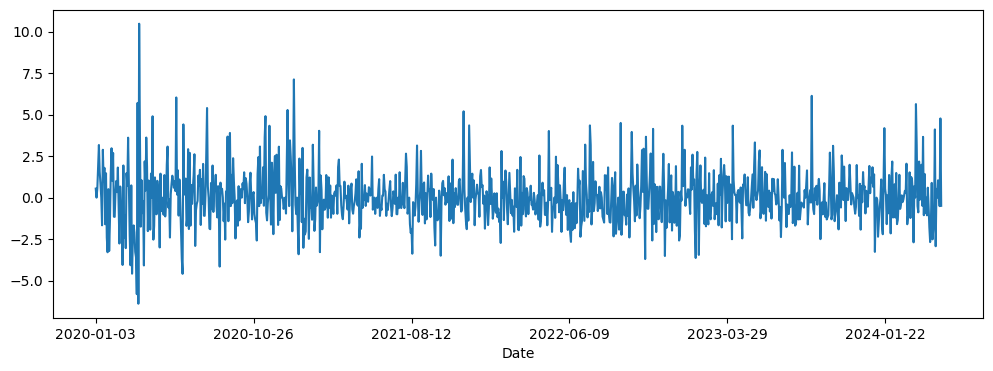

In [95]:
chart=samsung['Rate'].plot(figsize=(12,4))

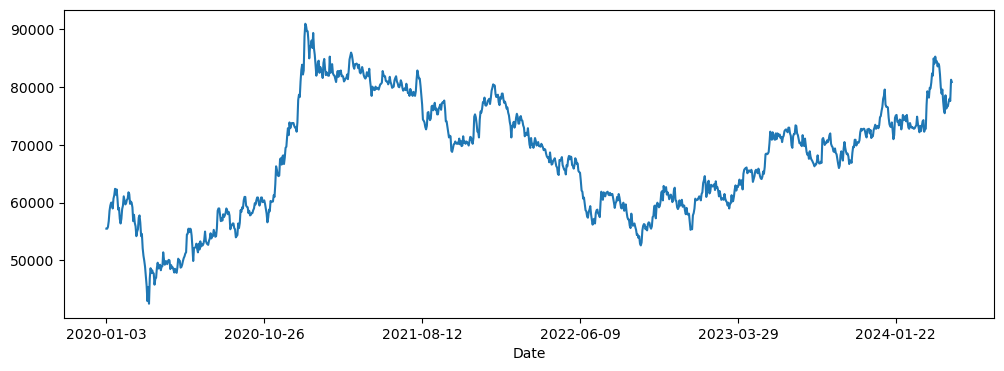

In [96]:
chart=samsung['Close'].plot(figsize=(12,4)) # 매일의 주가

In [97]:
# 5일 이동 평균선을 이용한 주가 흐름, 5일치의 평균 주가
samsung['Close'].rolling(window=5).mean().head(10)

Date
2020-01-03        NaN
2020-01-06        NaN
2020-01-07        NaN
2020-01-08        NaN
2020-01-09    56440.0
2020-01-10    57240.0
2020-01-13    58140.0
2020-01-14    58980.0
2020-01-15    59420.0
2020-01-16    59840.0
Name: Close, dtype: float64

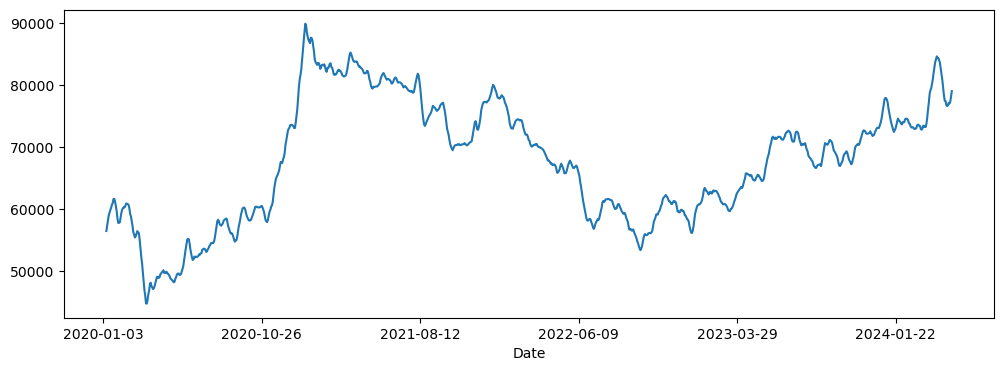

In [98]:
chart=samsung['Close'].rolling(window=5).mean().plot(figsize=(12,4)) # 5일 이동 평균

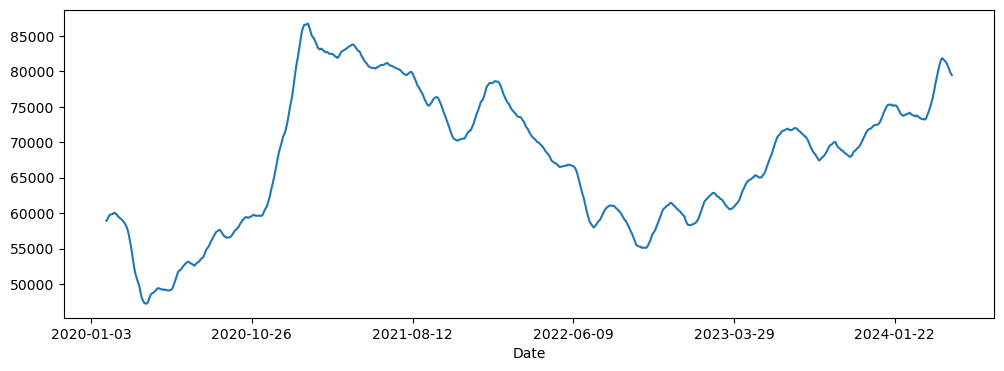

In [99]:
chart=samsung['Close'].rolling(window=20).mean().plot(figsize=(12,4)) # 5일 이동 평균

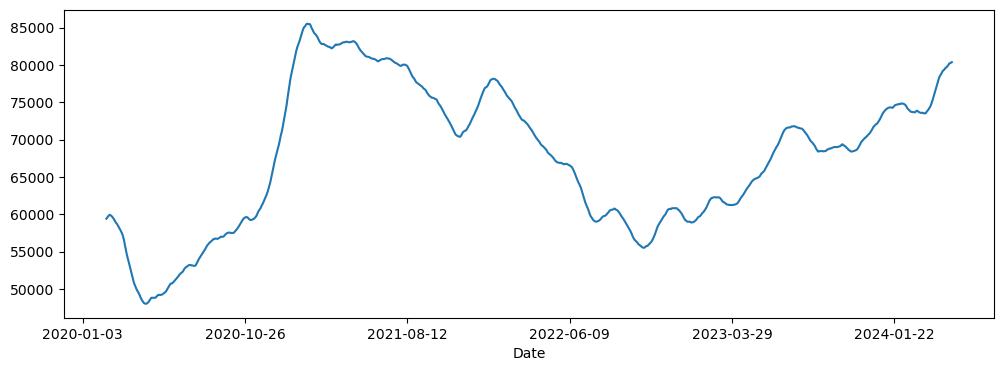

In [100]:
chart=samsung['Close'].rolling(window=30).mean().plot(figsize=(12,4)) # 30일 이동 평균

## KOSPI 지수와 삼성전자의 주가 상관성
- 삼성 전자의 주가가 우리나라의 경제에 영향을 미치는 영향력 파악

In [101]:
import FinanceDataReader as fdr

In [102]:
kospi = fdr.DataReader('KOSPI', "2020-01-03", "2024-05-08") # 삼성전자의 주가와 index를 일치
kospi

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2020-01-03,2192.58,2203.38,2165.39,2176.46,631562785,0.0006,1,1.29,5763662746548,1462298971774498
2020-01-06,2154.97,2164.42,2149.95,2155.07,592670719,-0.0098,2,-21.39,5156540935534,1448385085188395
2020-01-07,2166.60,2181.62,2164.27,2175.54,568235609,0.0095,1,20.47,5143511908278,1462298814406954
2020-01-08,2156.27,2162.32,2137.72,2151.31,913830628,-0.0111,2,-24.23,8750722208310,1446631314388659
2020-01-09,2182.20,2186.45,2172.16,2186.45,592603655,0.0163,1,35.14,7261591245997,1470805018622162
...,...,...,...,...,...,...,...,...,...,...
2024-04-30,2693.22,2710.23,2687.29,2692.06,460083516,0.0017,1,4.62,11347130197832,2193843858061216
2024-05-02,2679.04,2692.47,2678.84,2683.65,351087270,-0.0031,2,-8.41,9059052787751,2186876849586271
2024-05-03,2704.31,2705.26,2676.63,2676.63,338612027,-0.0026,2,-7.02,7850446650277,2180854242187852


In [103]:
samsung['Rate'].corr(kospi['Change']) # nan

nan

In [104]:
samsung['Rate']

Date
2020-01-03    0.543478
2020-01-06    0.000000
2020-01-07    0.540541
2020-01-08    1.792115
2020-01-09    3.169014
                ...   
2024-04-30    1.043025
2024-05-02    0.645161
2024-05-03   -0.512821
2024-05-07    4.768041
2024-05-08   -0.492005
Name: Rate, Length: 1072, dtype: float64

In [105]:
kospi['Change']

Date
2020-01-03    0.0006
2020-01-06   -0.0098
2020-01-07    0.0095
2020-01-08   -0.0111
2020-01-09    0.0163
               ...  
2024-04-30    0.0017
2024-05-02   -0.0031
2024-05-03   -0.0026
2024-05-07    0.0216
2024-05-08    0.0039
Name: Change, Length: 1072, dtype: float64

In [106]:
# 2일간의 비율을 가지고 비교하는 것은 2일간의 주가가 상쇄효가가 있음으로 상관성이 적게 나올 수 있음.
np.corrcoef(samsung['Rate'], kospi['Change']) 

array([[1.        , 0.79537261],
       [0.79537261, 1.        ]])

In [107]:
np.corrcoef(samsung['Close'], kospi['Close']) # 1일간의 종가와 지수 비교가 더 정확

array([[1.        , 0.90206679],
       [0.90206679, 1.        ]])

# DataFrame

In [108]:
import pandas as pd

In [111]:
df = pd.DataFrame(['1월', '2월', '3월'])
df

,0
0,1월
1,2월
2,3월


In [119]:
df = pd.DataFrame(['1월', '2월', '3월'], index=['jan', 'feb', 'mar'], columns=['month'])
df

,month
jan,1월
feb,2월
mar,3월


In [123]:
df = pd.DataFrame(['1월', '2월', '3월'])
df.index = ['jan', 'feb', 'mar']
df.columns = ['month']
df

,month
jan,1월
feb,2월
mar,3월


In [125]:
df = pd.DataFrame([['1월', '2월', '3월'], [1000, 2000, 3000]])
df

,0,1,2
0,1월,2월,3월
1,1000,2000,3000


In [127]:
data = {'month' : ['1월', '2월', '3월'], 'sales': [1000, 2000, 3000]}
df = pd.DataFrame(data)
df

,month,sales
0,1월,1000
1,2월,2000
2,3월,3000


In [129]:
df.to_numpy()

array([['1월', 1000],
       ['2월', 2000],
       ['3월', 3000]], dtype=object)

In [130]:
df = pd.read_csv('./data/samsung.csv', index_col=0, header=0) # 2020 ~ 2024-05-08
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2024-04-30,77000,78500,76600,77500,19007007,0.010430
2024-05-02,77600,78600,77300,78000,18900640,0.006452
2024-05-03,79000,79000,77500,77600,13151889,-0.005128


In [131]:
df['Open']

Date
2020-01-02    55500
2020-01-03    56000
2020-01-06    54900
2020-01-07    55700
2020-01-08    56200
              ...  
2024-04-30    77000
2024-05-02    77600
2024-05-03    79000
2024-05-07    79600
2024-05-08    80800
Name: Open, Length: 1073, dtype: int64

In [132]:
df[['Open', 'Close']].head(3) # DataFrame

,Open,Close
Date,,
2020-01-02,55500,55200
2020-01-03,56000,55500
2020-01-06,54900,55500


In [134]:
df.loc['2020-01-02']

Open         54900.0
High         55600.0
Low          54600.0
Close        55500.0
Volume    10278951.0
Change           0.0
Name: 2020-01-06, dtype: float64

In [137]:
df.loc[['2020-01-02', '2020-01-03', '2020-01-06']]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000


In [139]:
df.iloc[[0, 1, 2]] # 행 고유 인덱스, 언어의 배열 문법

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000


In [141]:
df.loc['2020-01-02':'2020-01-06']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000


In [144]:
df[df.columns[0:4]].head(3)

,Open,High,Low,Close
Date,,,,
2020-01-02,55500,56000,55000,55200
2020-01-03,56000,56600,54900,55500
2020-01-06,54900,55600,54600,55500


## 자신이 관심 있는 기업 주가 수집(삼성, NVIDIA, TSLA, SK하이닉스(000660))

In [148]:
import FinanceDataReader as fdr
# KRX : KRX 종목 전체
# KOSPI : KOSPI 종목
# KOSDAQ : KOSDAQ 종목
# KONEX : KONEX 종목
# NASDAQ : 나스닥 종목
# NYSE : 뉴욕증권거래소 종목
# SP500 : S&P500 종목

In [160]:
df_krx = fdr.StockListing("KRX") # 상장 업체 목록

In [193]:
# 주어진 회사 이름과 정확히 일치하는 종목 코드 찾기
# company = "삼성전자"  # 여기서 "회사이름"을 실제 회사 이름으로 변경하세요.
# code = df_krx[df_krx['Name'] == company]
# print(code)

## 한국 주식 수집 함수

In [186]:
df_krx = fdr.StockListing("KRX") # 상장 업체 목록
def get_code_krx(company):
    df_krx = fdr.StockListing("KRX") # 상장 업체 목록
    code = df_krx[df_krx['Name'].str.lower() == company.lower()]['Code'][0]

    return code

get_code_krx('삼성전자')

'005930'

## 국내 주식 거래 정보 수집

In [210]:
def get_list_krx(company, start, end):
    code = get_code_krx(company) # 기업 코드
    df = fdr.DataReader(code, start, end)

    return df

get_list_krx('삼성전자', '2015-01-01', '2024-05-14').head(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356


## 해외 주식 수집 함수

In [205]:
df_nasdaq = fdr.StockListing("NASDAQ") # 상장 업체 목록
print(df_nasdaq[df_nasdaq['Name'].str.contains('NVIDIA', case=False)])
print(type(df_nasdaq[df_nasdaq['Name'].str.contains('NVIDIA', case=False)]['Symbol']))
# print(type(df_nasdaq[df_nasdaq['Name'].str.contains('NVIDIA', case=False)]['Symbol'][0])) # index 2, X
print(type(df_nasdaq[df_nasdaq['Name'].str.contains('NVIDIA', case=False)]['Symbol'].iloc[0])) # array index
print(df_nasdaq[df_nasdaq['Name'].str.contains('NVIDIA', case=False)]['Symbol'].iloc[0])

100%|████████████████████████████████████████████████████████████████████████████| 3780/3780 [00:02<00:00, 1501.44it/s]


  Symbol         Name IndustryCode Industry
2   NVDA  NVIDIA Corp     57101010      반도체
<class 'pandas.core.series.Series'>
<class 'str'>
NVDA


In [196]:
def get_symbol_nasdaq(company):
    df_nasdaq = fdr.StockListing("NASDAQ") # 상장 업체 목록
    symbol = df_nasdaq[df_nasdaq['Name'].str.contains(company, case=False)]['Symbol'].iloc[0]

    return symbol

get_symbol_nasdaq('NVIDIA')

100%|████████████████████████████████████████████████████████████████████████████| 3780/3780 [00:03<00:00, 1210.35it/s]


'NVDA'

## 해외 주식 거래 정보 수집

In [275]:
def get_list_nasdaq(company, start, end):  # 예시: 'AAPL', '2020-01-01', '2024-05-14'
    code = get_symbol_nasdaq(company)  # 기업 코드
    df = fdr.DataReader(code, start, end)
    exchange_rate = 1360  # 환율 적용 1$ = 1360

    # 각 컬럼에 환율 적용 후 정수형으로 변환
    df['Open'] = (df['Open'] * exchange_rate).astype(int)
    df['High'] = (df['High'] * exchange_rate).astype(int)
    df['Low'] = (df['Low'] * exchange_rate).astype(int)
    df['Close'] = (df['Close'] * exchange_rate).astype(int)
    df['Adj Close'] = (df['Adj Close'] * exchange_rate).astype(int)

    return df

get_list_nasdaq('NVIDIA', '2015-01-01', '2024-05-14').head(3)

100%|████████████████████████████████████████████████████████████████████████████| 3780/3780 [00:03<00:00, 1175.77it/s]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,6844,6895,6735,6844,6572,11368000
2015-01-05,6844,6864,6698,6728,6461,19795200
2015-01-06,6738,6745,6517,6524,6265,19776400


## index(날짜)를 이용한 거래 날짜 통일
- 국내와 해외 휴장일이 다름

In [276]:
samsung = get_list_krx('삼성전자', '2015-01-01', '2024-05-14')
display(samsung.tail(3))
nvda = get_list_nasdaq('NVIDIA', '2015-01-01', '2024-05-14')
display(nvda.tail(3))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-05-10,80400,81100,78900,79200,16976124,-0.006274
2024-05-13,79400,79900,77600,78400,18652344,-0.010101
2024-05-14,78600,78800,77900,78100,8135942,-0.003827


100%|████████████████████████████████████████████████████████████████████████████| 3780/3780 [00:03<00:00, 1232.20it/s]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-09,1231194,1238579,1199941,1206959,1206959,37801300
2024-05-10,1228147,1243053,1213487,1222340,1222340,33532500
2024-05-13,1230500,1237572,1203994,1229426,1229426,28879300


In [277]:
print(samsung.shape)
print(nvda.shape)

(2304, 6)
(2356, 6)


In [278]:
samsung = samsung[['Close']]
samsung.head(3)

,Close
Date,
2015-01-02,26600
2015-01-05,26660
2015-01-06,25900


In [279]:
nvda = nvda[['Close']]
nvda.head(3)

,Close
Date,
2015-01-02,6844
2015-01-05,6728
2015-01-06,6524


In [280]:
samsung.columns = ['Samsung']
display(samsung.head(3))
nvda.columns = ['NVIDIA']
display(nvda.head(3))

,Samsung
Date,
2015-01-02,26600
2015-01-05,26660
2015-01-06,25900


,NVIDIA
Date,
2015-01-02,6844
2015-01-05,6728
2015-01-06,6524


In [281]:
# 같은 날짜 기준으로 join
df = samsung.join(nvda, how='inner')
df.shape

(2231, 2)

In [282]:
df.head() # 한국에만 있는 

,Samsung,NVIDIA
Date,,
2015-01-02,26600,6844
2015-01-05,26660,6728
2015-01-06,25900,6524
2015-01-07,26140,6507
2015-01-08,26280,6752


## 변동률(등락률) 계산

In [283]:
df_test = df.copy() # deep copy
df_test.head(3)

,Samsung,NVIDIA
Date,,
2015-01-02,26600,6844
2015-01-05,26660,6728
2015-01-06,25900,6524


In [284]:
df_test['Samsung_change'] = df_test['Samsung'].pct_change()
df_test['NVIDIA_change'] = df_test['NVIDIA'].pct_change()
df_test.head(3)

,Samsung,NVIDIA,Samsung_change,NVIDIA_change
Date,,,,
2015-01-02,26600,6844,NaN,NaN
2015-01-05,26660,6728,0.002256,-0.016949
2015-01-06,25900,6524,-0.028507,-0.030321


In [285]:
df_test.fillna(0, inplace=True)
df_test.head(3)

,Samsung,NVIDIA,Samsung_change,NVIDIA_change
Date,,,,
2015-01-02,26600,6844,0.000000,0.000000
2015-01-05,26660,6728,0.002256,-0.016949
2015-01-06,25900,6524,-0.028507,-0.030321


In [286]:
df = df_test

### 시각화 한글 처리

In [287]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import platform 

if (platform.system() == 'Windows'):  # Windows, Linux, Darwin
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
elif (platform.system() == 'Linux'):   
    rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/kd_ml' # Colab
else:
    pass

plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 3) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

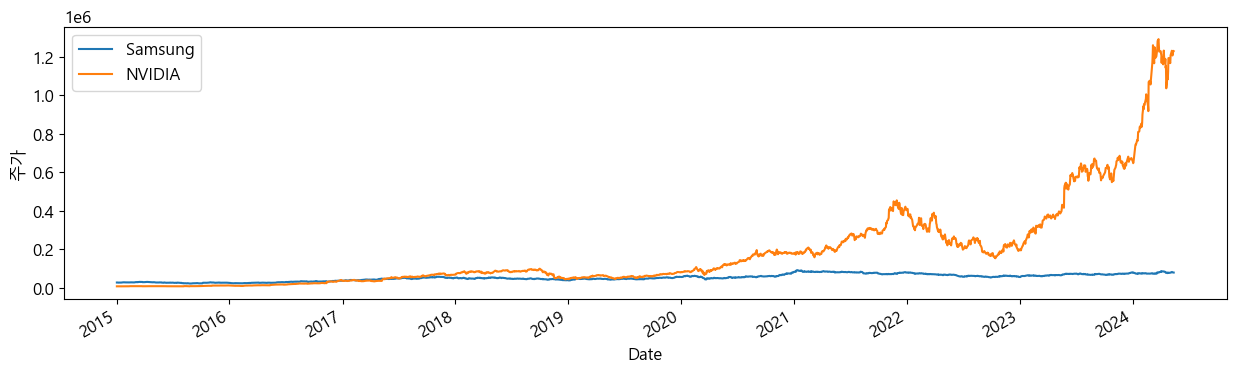

In [288]:
line = df[['Samsung', 'NVIDIA']].plot(ylabel='주가', figsize=(15, 4))

In [289]:
df

,Samsung,NVIDIA,Samsung_change,NVIDIA_change
Date,,,,
2015-01-02,26600,6844,0.000000,0.000000
2015-01-05,26660,6728,0.002256,-0.016949
2015-01-06,25900,6524,-0.028507,-0.030321
2015-01-07,26140,6507,0.009266,-0.002606
2015-01-08,26280,6752,0.005356,0.037652
...,...,...,...,...
2024-05-07,81300,1231534,0.047680,0.019879
2024-05-08,81300,1229603,0.000000,-0.001568
2024-05-09,79700,1206959,-0.019680,-0.018416


## 수익률 비교

In [290]:
Samsung_start = df.iloc[0]['Samsung'].astype(int)
NVIDIA_start = df.iloc[0]['NVIDIA'].astype(int)

print(Samsung_start)
print(NVIDIA_start)

26600
6844


In [293]:
df['Samsung_rate'] = (df['Samsung'] / Samsung_start - 1)  # 원금을 제외한 수익률
df['NVIDIA_rate'] = (df['NVIDIA'] / NVIDIA_start - 1)  

df

,Samsung,NVIDIA,Samsung_change,NVIDIA_change,Samsung_rate,NVIDIA_rate
Date,,,,,,
2015-01-02,26600,6844,0.000000,0.000000,0.000000,0.000000
2015-01-05,26660,6728,0.002256,-0.016949,0.002256,-0.016949
2015-01-06,25900,6524,-0.028507,-0.030321,-0.026316,-0.046756
2015-01-07,26140,6507,0.009266,-0.002606,-0.017293,-0.049240
2015-01-08,26280,6752,0.005356,0.037652,-0.012030,-0.013442
...,...,...,...,...,...,...
2024-05-07,81300,1231534,0.047680,0.019879,2.056391,178.943600
2024-05-08,81300,1229603,0.000000,-0.001568,2.056391,178.661455
2024-05-09,79700,1206959,-0.019680,-0.018416,1.996241,175.352864


<Axes: xlabel='거래일', ylabel='주가'>

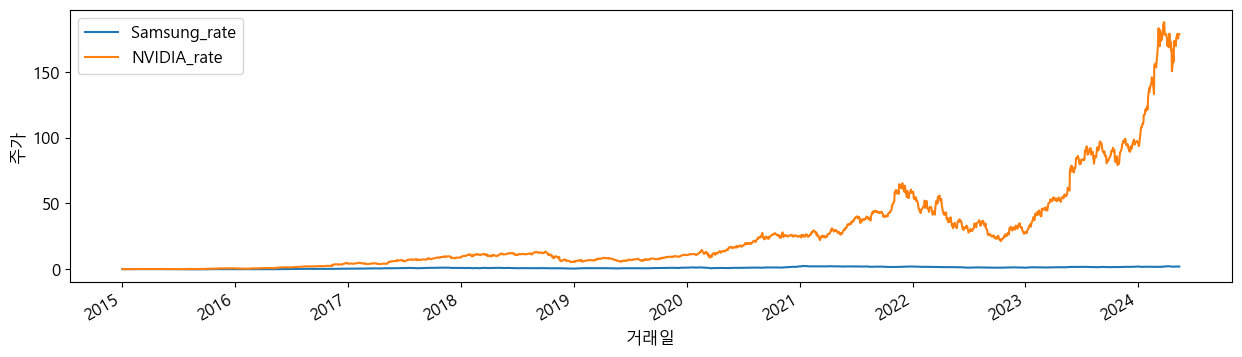

In [295]:
df[['Samsung_rate', 'NVIDIA_rate']].plot(xlabel='거래일'), ylabel='주가',  figsize=(15, 4))

100%|████████████████████████████████████████████████████████████████████████████| 3780/3780 [00:02<00:00, 1339.85it/s]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-07,1.238933e+06,1.248222e+06,1.119620e+06,1.231534e+06,1.231534e+06,43734200
2024-05-08,1.216969e+06,1.240238e+06,1.216112e+06,1.229603e+06,1.229603e+06,32572100
2024-05-09,1.231194e+06,1.238579e+06,1.199942e+06,1.206959e+06,1.206959e+06,37801300
2024-05-10,1.228148e+06,1.243054e+06,1.213487e+06,1.222341e+06,1.222341e+06,33532500
2024-05-13,1.230501e+06,1.237573e+06,1.203994e+06,1.229426e+06,1.229426e+06,28879300


In [ ]:
# 종가 2개 결합
